# Analysis of Winter Olympics medals

### The following script analyses the information obtained from the wepage "", concerning medals awarded in every Winter Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns


## Reading the Data
### Data consists of the following eight categories: 
### Year, city, sport, discipline, NOC, Event, event Gender and Medal.


In [2]:
medals_wo=pd.read_csv("/Users/olaf/Documents/Python/Data/medals.csv")
medals_wo = medals_wo.rename(columns = {"Event gender" : "Event_gender"})

In [3]:
medals_wo.shape

(2311, 8)

In [4]:
medals_wo.head()

,Year,City,Sport,Discipline,NOC,Event,Event_gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [5]:
medals_wo.tail()

,Year,City,Sport,Discipline,NOC,Event,Event_gender,Medal
2306,2006,Turin,Skiing,Snowboard,USA,Half-pipe,M,Silver
2307,2006,Turin,Skiing,Snowboard,USA,Half-pipe,W,Gold
2308,2006,Turin,Skiing,Snowboard,USA,Half-pipe,W,Silver
2309,2006,Turin,Skiing,Snowboard,USA,Snowboard Cross,M,Gold
2310,2006,Turin,Skiing,Snowboard,USA,Snowboard Cross,W,Silver


In [6]:
### The database consists of 2311 different medals, from 1924 until 2016.
### In total, there are 67 different events considered in the data base.

In [7]:
sports = medals_wo.Event.unique()
number_of_sports=len(sports)
number_of_sports

67

In [8]:
sports

array(['individual', 'pairs', 'four-man', 'ice hockey', 'military patrol',
       '10000m', '1500m', '5000m', '500m', 'combined (4 events)', '18km',
       'curling', '50km', 'K90 individual (70m)', 'five-man', 'two-man',
       '4x10km relay', 'alpine combined', 'downhill', 'slalom',
       'giant slalom', '10km', '30km mass start', '3x5km relay', '15km',
       '1000m', '20km', '3000m', 'doubles', 'singles', '5km',
       'K120 individual (90m)', '4x7.5km relay', '4x5km relay',
       'ice dancing', 'super-G', 'Team', 'K120 team (90m)', '3000m relay',
       '5000m relay', '3x7.5km relay', '7.5km', '15km mass start', '30km',
       'Combined 5km + 10km pursuit', 'moguls', '10km pursuit',
       'Combined 10km + 15km pursuit', 'aerials', 'giant-slalom',
       'Half-pipe', 'sprint', '5km pursuit', '12.5km pursuit',
       'Giant parallel slalom', 'Sprint 1.5km', 'sprint 1.5km',
       'Alpine combined', 'Individual', 'Individual sprint',
       'Team pursuit', 'Team sprint', 'Snowboar

## Gender information
### The data base considers three different gender types: Male, Female and Couples. Couples is a broad term,
### because couples can be of mixed gender, female-only or male-only.

In [9]:
gender_categories = medals_wo.Event_gender.unique()
gender_categories


array(['M', 'W', 'X'], dtype=object)

## Medals by men

Text(0, 0.5, 'Number of medals for Men')

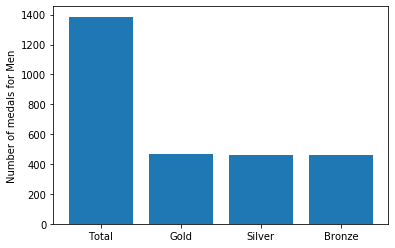

In [10]:
mm_total=medals_wo[(medals_wo["Event_gender"]== "M")]

mm_gold=medals_wo[(medals_wo["Event_gender"]== "M") & (medals_wo["Medal"]== "Gold")]
mm_silver=medals_wo[(medals_wo["Event_gender"]== "M") & (medals_wo["Medal"]== "Silver")]
mm_bronze=medals_wo[(medals_wo["Event_gender"]== "M") & (medals_wo["Medal"]== "Bronze")]

medals_men=[mm_total.shape[0], mm_gold.shape[0],mm_silver.shape[0], mm_bronze.shape[0]]

plt.bar(["Total","Gold","Silver","Bronze"],medals_men)
plt.ylabel("Number of medals for Men")

In [11]:
medals_men

[1386, 464, 462, 460]

## Medals by women

Text(0, 0.5, 'Number of medals for Women')

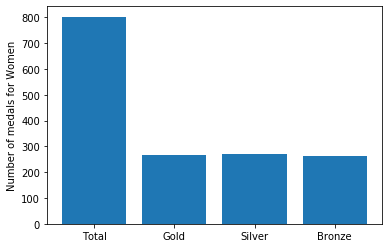

In [12]:
mw_total = medals_wo[(medals_wo["Event_gender"]== "W")]
mw_gold = medals_wo[(medals_wo["Event_gender"]== "W") & (medals_wo["Medal"]== "Gold")]
mw_silver = medals_wo[(medals_wo["Event_gender"]== "W") & (medals_wo["Medal"]== "Silver")]
mw_bronze = medals_wo[(medals_wo["Event_gender"]== "W") & (medals_wo["Medal"]== "Bronze")]

medals_women = [mw_total.shape[0], mw_gold.shape[0],mw_silver.shape[0], mw_bronze.shape[0]]
           
plt.bar(["Total","Gold","Silver","Bronze"],medals_women)
plt.ylabel("Number of medals for Women")

In [13]:
medals_women

[802, 267, 272, 263]

## Medals by pairs

Text(0, 0.5, 'Number of medals for Pairs')

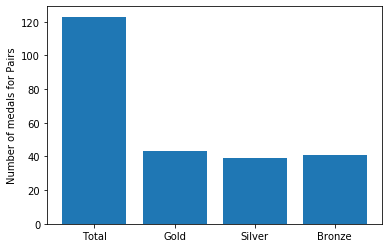

In [14]:
mx_total = medals_wo[(medals_wo["Event_gender"]== "X")]
mx_gold = medals_wo[(medals_wo["Event_gender"]== "X") & (medals_wo["Medal"]== "Gold")]
mx_silver = medals_wo[(medals_wo["Event_gender"]== "X") & (medals_wo["Medal"]== "Silver")]
mx_bronze = medals_wo[(medals_wo["Event_gender"]== "X") & (medals_wo["Medal"]== "Bronze")]

medals_pairs = [mx_total.shape[0], mx_gold.shape[0],mx_silver.shape[0], mx_bronze.shape[0]]
medals_pairs           
plt.bar(["Total","Gold","Silver","Bronze"],medals_pairs)
plt.ylabel("Number of medals for Pairs")

In [15]:
medals_pairs 

[123, 43, 39, 41]

In [16]:
difference=medals_men[0] - medals_women[0]
difference

584

### The results shows a very similar distribution of medals, which is expected since for every event three medals ### are given.

### Results shows that on the first Winter Olympic games, women could compete only in 3 different events, while in 2006 the participated in 111.
### Men have 584 more medals than women. 


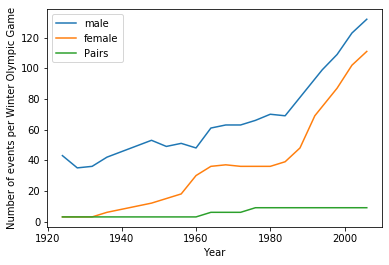

In [25]:
years = medals_wo.Year.unique()
gender=["M","W","X"]
events=[]
games_recount={"Men":[],
               "Women":[],
                "Pairs":[]}

counter=0

for y in range(len(gender)):
    
    for x in range(len(years)):
    
        events_per_game = medals_wo[(medals_wo["Event_gender"]== gender[y]) & (medals_wo["Year"] == years[x])]
        events.append(events_per_game.shape[0])
        vect=[events[0],events[-1]]
        
    if counter == 0:
        games_recount["Men"] = events
    if counter == 1:
        games_recount["Women"] = events
    if counter == 2:    
        games_recount["Pairs"] = events

        
    plt.plot(years,events) 
    events = []
    counter +=1
    
plt.ylabel("Number of events per Winter Olympic Game")
plt.xlabel("Year")
plt.legend(["male","female","Pairs"])
recount = pd.DataFrame(games_recount)

### Exploring the information, it shows that events where women are able to be part of are less that those available for men, altough this gap is becoming smaller.

Text(0, 0.5, "['Men events / Women events']")

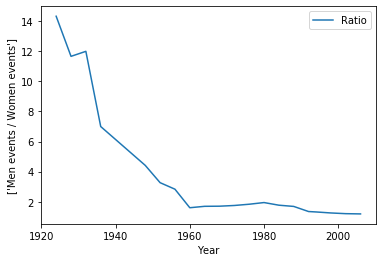

In [96]:
comparison = recount["Men"] / recount["Women"]

plt.plot(years,comparison)
plt.legend("Ratio")
plt.xlabel("Year")
plt.ylabel("Men events / Women events")

In [70]:
countries = pd.unique(medals_wo['NOC'])
countries=sorted(countries)

In [98]:
country_medals={}
country_gold = {}
country_silver = {}
country_bronze = {}

for x in range(len(countries)):
    t_medals=[]
    t_gold = []
    t_silver = []
    t_bronze = []
    
    for y in range(len(years)):
        gold_m = medals_wo[(medals_wo["NOC"] == countries[x]) & (medals_wo["Year"] == years[y]) & (medals_wo["Medal"] == "Gold")]
        silver_m = medals_wo[(medals_wo["NOC"] == countries[x]) & (medals_wo["Year"] == years[y]) & (medals_wo["Medal"] == "Silver")]
        bronze_m = medals_wo[(medals_wo["NOC"] == countries[x]) & (medals_wo["Year"] == years[y]) & (medals_wo["Medal"] == "Bronze")]
        
        t_medals.append(gold_m.shape[0]+silver_m.shape[0]+bronze_m.shape[0])
        t_gold.append(gold_m.shape[0])
        t_silver.append(silver_m.shape[0])
        t_bronze.append(bronze_m.shape[0])
    
    country_medals[countries[x]] = t_medals
    country_gold[countries[x]] = t_gold
    country_silver[countries[x]] = t_silver
    country_bronze[countries[x]] = t_bronze
    
total_medals = pd.DataFrame(country_medals)
total_gold = pd.DataFrame(country_gold)
total_silver = pd.DataFrame(country_silver)
total_bronze = pd.DataFrame(country_bronze)


## Countries with more medals in total

<BarContainer object of 45 artists>

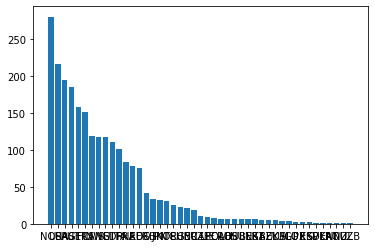

In [86]:
total_cm=[]
for x in range(len(countries)):
    var = total_medals[countries[x]]
    var2 = sum(var)
    total_cm.append(var2)
 
total_med={"Country": countries,
           "Total": total_cm}

total_med = pd.DataFrame(total_med)
total_med = total_med.sort_values(by = "Total",ascending = False)

plt.bar(total_med["Country"],total_med["Total"])


In [ ]:
### Historic top 10 is:

In [88]:
total_med.head(10)


,Country,Total
29,NOR,280
42,USA,216
41,URS,194
1,AUT,185
19,GER,158
14,FIN,151
5,CAN,119
38,SWE,118
36,SUI,118
18,GDR,110


## Countries with more god medals

<BarContainer object of 45 artists>

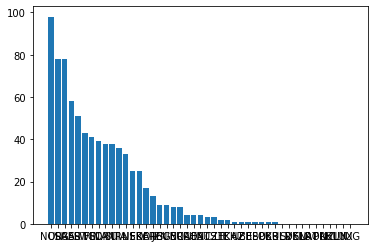

In [91]:
total_cm=[]
for x in range(len(countries)):
    var = total_gold[countries[x]]
    var2 = sum(var)
    total_cm.append(var2)
 
total_mg={"Country": countries,
           "Total": total_cm}

total_mg = pd.DataFrame(total_mg)
total_mg = total_mg.sort_values(by = "Total",ascending = False)

plt.bar(total_mg["Country"],total_mg["Total"])

### The top 10 is:

In [92]:
total_mg.head(10)

,Country,Total
29,NOR,98
42,USA,78
41,URS,78
19,GER,58
1,AUT,51
38,SWE,43
14,FIN,41
18,GDR,39
5,CAN,38
36,SUI,38


<BarContainer object of 45 artists>

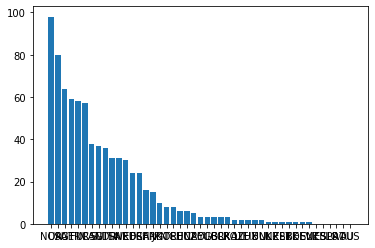

In [99]:
total_cm=[]
for x in range(len(countries)):
    var = total_silver[countries[x]]
    var2 = sum(var)
    total_cm.append(var2)
 
total_ms={"Country": countries,
           "Total": total_cm}

total_ms = pd.DataFrame(total_ms)
total_ms = total_ms.sort_values(by = "Total",ascending = False)

plt.bar(total_ms["Country"],total_ms["Total"])

In [100]:
total_ms.head(10)

,Country,Total
29,NOR,98
42,USA,80
1,AUT,64
19,GER,59
14,FIN,58
41,URS,57
5,CAN,38
36,SUI,37
18,GDR,36
21,ITA,31


<BarContainer object of 45 artists>

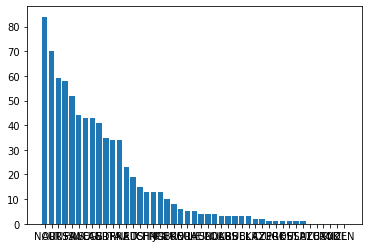

In [103]:
total_cm=[]
for x in range(len(countries)):
    var = total_bronze[countries[x]]
    var2 = sum(var)
    total_cm.append(var2)
 
total_mb={"Country": countries,
           "Total": total_cm}

total_mb = pd.DataFrame(total_mb)
total_mb = total_mb.sort_values(by = "Total",ascending = False)

plt.bar(total_mb["Country"],total_mb["Total"])

In [104]:
total_mb.head(10)

,Country,Total
29,NOR,84
1,AUT,70
41,URS,59
42,USA,58
14,FIN,52
38,SWE,44
36,SUI,43
5,CAN,43
19,GER,41
18,GDR,35


[42    USA
 41    URS
 19    GER
 1     AUT
 38    SWE
 14    FIN
 18    GDR
 5     CAN
 36    SUI
 Name: Country, dtype: object, 42    USA
 1     AUT
 19    GER
 14    FIN
 41    URS
 5     CAN
 36    SUI
 18    GDR
 21    ITA
 Name: Country, dtype: object, 1     AUT
 41    URS
 42    USA
 14    FIN
 38    SWE
 36    SUI
 5     CAN
 19    GER
 18    GDR
 Name: Country, dtype: object]